### Loading required libraries

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from collections import Counter
print(os.listdir("."))
print(os.listdir('planet-understanding-the-amazon-from-space'))
%matplotlib inline

['.DS_Store', 'test-jpg.tar', 'train-jpg.tar', 'train-jpg.tar.7z', 'satellite-amazon-model-keras-vgg19-adam.ipynb', 'test-jpg.tar.7z', '.ipynb_checkpoints', 'planet-understanding-the-amazon-from-space']
['.DS_Store', 'sample_submission_v2.csv', 'test-jpg', 'test_v2_file_mapping.csv', 'train_v2.csv', 'Kaggle-planet-test-tif.torrent', 'Kaggle-planet-train-tif.torrent', 'train-jpg']


In [71]:
labels_df = pd.read_csv('planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv')
print('images in training set :', labels_df.shape[0])
labels_df = labels_df.sample(frac = 1)
labels_df.head()

images in training set : 40479


,image_name,tags
14773,train_14773,cloudy
27415,train_27415,clear primary
23249,train_23249,clear primary
19043,train_19043,clear primary
34998,train_34998,partly_cloudy primary


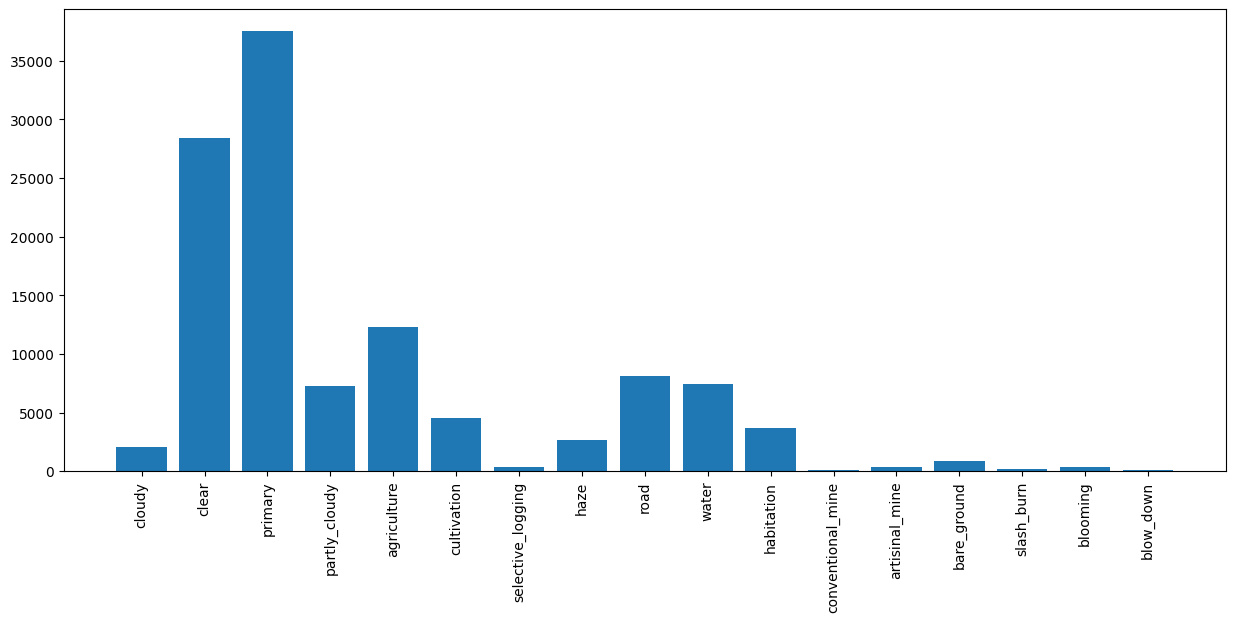

In [72]:
counter = Counter([])
for tag_list in labels_df['tags'].apply(lambda x:x.split(' ')):
   counter.update(tag_list)
label_names,count = zip(*counter.items())
fig = plt.figure(figsize = (15,6))
ax = plt.gca()
ax.bar(np.arange(0,len(label_names),1),count, tick_label = label_names)
plt.xticks(rotation = 90)
plt.show()


In [73]:
column_df = pd.DataFrame(np.zeros((labels_df.shape[0],17)), columns = label_names)
labels_df = pd.concat([labels_df,column_df],axis =1, join = 'inner')
labels_df.head()

,image_name,tags,cloudy,clear,primary,partly_cloudy,agriculture,cultivation,selective_logging,haze,road,water,habitation,conventional_mine,artisinal_mine,bare_ground,slash_burn,blooming,blow_down
14773,train_14773,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27415,train_27415,clear primary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23249,train_23249,clear primary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19043,train_19043,clear primary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34998,train_34998,partly_cloudy primary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# Set columns based on tags
for index, row in labels_df.iterrows():
    # Split the tags into a list
    tags = row['tags'].split()
    # Set each corresponding column to 1.0 if it's in the tags list
    for tag in tags:
        if tag in labels_df.columns:
            labels_df.at[index, tag] = 1.0

In [75]:
labels_df

,image_name,tags,cloudy,clear,primary,partly_cloudy,agriculture,cultivation,selective_logging,haze,road,water,habitation,conventional_mine,artisinal_mine,bare_ground,slash_burn,blooming,blow_down
14773,train_14773,cloudy,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27415,train_27415,clear primary,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23249,train_23249,clear primary,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19043,train_19043,clear primary,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34998,train_34998,partly_cloudy primary,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23874,train_23874,blow_down partly_cloudy primary,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
587,train_587,clear primary,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27186,train_27186,clear primary,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36026,train_36026,partly_cloudy primary,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
labels_df = pd.read_feather('labels-df/labels_df.feather')

FileNotFoundError: [Errno 2] No such file or directory: 'labels-df/labels_df.feather'

In [77]:
labels_df.drop(['tags'],inplace = True, axis=1)
labels_df.shape

(40479, 18)

In [78]:
labels_df.head(5)

,image_name,cloudy,clear,primary,partly_cloudy,agriculture,cultivation,selective_logging,haze,road,water,habitation,conventional_mine,artisinal_mine,bare_ground,slash_burn,blooming,blow_down
14773,train_14773,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27415,train_27415,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23249,train_23249,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19043,train_19043,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34998,train_34998,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
from sklearn.model_selection import train_test_split
train_labels, valid_labels = train_test_split(labels_df, test_size = 0.2)
train_labels.shape, valid_labels.shape
train_labels

,image_name,cloudy,clear,primary,partly_cloudy,agriculture,cultivation,selective_logging,haze,road,water,habitation,conventional_mine,artisinal_mine,bare_ground,slash_burn,blooming,blow_down
147,train_147,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13387,train_13387,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,train_130,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20794,train_20794,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32492,train_32492,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25017,train_25017,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31242,train_31242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38423,train_38423,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29651,train_29651,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
img_path = 'planet-understanding-the-amazon-from-space/train-jpg/{}.jpg'
train_images = train_labels['image_name'].apply(lambda x: img_path.format(x)).values
valid_images = valid_labels['image_name'].apply(lambda x:img_path.format(x)).values

In [81]:
train_images.shape, valid_images.shape

((32383,), (8096,))

### Preparing images(data augmentation)

In [82]:
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator

def get_data_iter(data_gen, img_size,label_df, img_list, batch_size, shuffle = True):
    generator = data_gen.flow_from_directory(directory = 'planet-understanding-the-amazon-from-space/train-jpg', target_size = (img_size,img_size), 
                                                             batch_size = batch_size, class_mode = 'sparse', shuffle = shuffle)
    generator.filenames = img_list
    generator.classes =  label_df.loc[:,label_df.columns !='image_name'].values
    generator.samples = label_df.loc[:,label_df.columns !='image_name'].values.shape[0]
    generator.n = label_df.loc[:,label_df.columns !='image_name'].values.shape[0]
    generator.directory = ''
    generator._set_index_array()
    return generator

In [83]:
data_generator_aug = ImageDataGenerator( rescale = 1./255, horizontal_flip = True,  vertical_flip = True, 
                                        width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 10)

train_generator = get_data_iter(data_generator_aug, 128, train_labels, train_images,64, shuffle = False)

Found 0 images belonging to 0 classes.


In [84]:
data_generator_no_aug = ImageDataGenerator(rescale = 1./255)
valid_generator =  get_data_iter(data_generator_no_aug, 128, valid_labels, valid_images, 2048, shuffle = False) 

Found 0 images belonging to 0 classes.


In [90]:
train_generator_no_aug =  get_data_iter(data_generator_no_aug, 128, train_labels, train_images,64, shuffle = False)

Found 0 images belonging to 0 classes.


In [91]:
train_labels.columns[1:]

Index(['cloudy', 'clear', 'primary', 'partly_cloudy', 'agriculture',
       'cultivation', 'selective_logging', 'haze', 'road', 'water',
       'habitation', 'conventional_mine', 'artisinal_mine', 'bare_ground',
       'slash_burn', 'blooming', 'blow_down'],
      dtype='object')

In [92]:
t_imgs, t_labels = next(train_generator_no_aug)

aug_imgs, aug_labels = next(train_generator)

labels = train_labels.columns[1:]

fixed_val_imgs,fixed_val_labels = next(valid_generator)
fixed_val_imgs.shape, fixed_val_labels.shape

IndexError: list index out of range

In [69]:
t_imgs.shape, t_labels.shape

NameError: name 't_imgs' is not defined

In [ ]:
aug_imgs.shape, aug_labels.shape

In [ ]:
def get_label(x):
    s = np.where(x==1)
    k = s[0]
    strings = ', '.join(labels[k])
    return(strings)

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (15,15))
i = np.random.randint(0,aug_labels.shape[0])
i = 36
x = np.apply_along_axis(get_label, 1, aug_labels)
image_original = t_imgs[i]
image_aug = aug_imgs[i]
ax[0].imshow(image_original)
ax[0].set_title('Original-' + x[i], fontsize =15)
ax[1].imshow(image_aug)
ax[1].set_title('Augmented-' + x[i], fontsize =15)
fig.savefig('orig_aug1.png')

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (15,15))
i = 59
x = np.apply_along_axis(get_label, 1, aug_labels)
image_original = t_imgs[i]
image_aug = aug_imgs[i]
ax[0].imshow(image_original)
ax[0].set_title('Original-' + x[i], fontsize =15)
ax[1].imshow(image_aug)
ax[1].set_title('Augmented-' + x[i], fontsize =15)
fig.savefig('orig_aug2.png')

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (15,15))
i = np.random.randint(0,aug_labels.shape[0])
i = 56
x = np.apply_along_axis(get_label, 1, aug_labels)
image_original = t_imgs[i]
image_aug = aug_imgs[i]
ax[0].imshow(image_original)
ax[0].set_title('Original-' + x[i], fontsize =15)
ax[1].imshow(image_aug)
ax[1].set_title('Augmented-' + x[i], fontsize =15)
fig.savefig('orig_aug3.png')

In [ ]:
def set_non_trainable_layers(model, range_from, range_to):
    for i in range(0, len(model.layers)):
        if range_from <=  i <= range_to:
            model.layers[i].trainable = False
        else:
            model.layers[i].trainable = True

# Building model

In [ ]:
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.applications.vgg19 import VGG19

img_size = 128 #64
num_classes = 17


weights_path = '../input/vgg19-weights/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model  = VGG19(include_top=False, weights= weights_path,  input_shape= (img_size, img_size, 3) )
x = base_model.output
x = Flatten()(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation = 'sigmoid')(x)

model = Model(inputs = base_model.input, outputs = predictions)   #check if input size can be turned off
set_non_trainable_layers(base_model, 0, 21)

for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)
model.summary()


### Callbacks for weights saving 

In [ ]:
from tensorflow.python.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weights_path = 'adam_weights.hd5'
checkpoint = ModelCheckpoint(weights_path, monitor = 'val_loss', save_best_only = True, save_weights_only = True, mode = 'min', verbose =1)

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lrs = []
        self.batches = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        #lr = self.model.optimizer.lr
        #self.lrs.append(K.cast(lr, 'float32'))

    def on_train_end(self, logs = None):
        plt.rcParams["figure.figsize"] = (8,15)
        plt.plot(np.arange(0,len(self.losses),1)[::5],self.losses[::5], color = 'blue')
        plt.title('Loss with batches')
        plt.xlabel('batch')
        plt.ylabel('mse loss')
        plt.show()
        
    
class LRFinder(Callback):  #ignore 
    def __init__(self, max_batches = 5000, base_lr = 1e-4, max_lr = 0.1, lr_step_size = 1e-4):
        self.max_batches = max_batches
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.lr_step_size = lr_step_size
        self.lr = 0
        self.lrs = []
        self.losses = []
        self.batches = []
        
    def on_batch_end(self, batch, logs={}):
        current_batch = logs.get('batch')
        self.batches.append(current_batch)
        #print(current_batch)
        '''
        if current_batch >= self.max_batches or self.lr >= self.max_lr:
            self.model.stop_training = True
        else:
            self.lr = self.lr + (current_batch * self.lr_step_size)
            K.set_value(self.model.optimizer.lr, self.lr)
            self.losses.append(logs.get('loss'))
            self.lrs.append(self.lr)
    '''
    def on_train_end(self, logs = None):
        plt.rcParams["figure.figsize"] = (20,10)
        plt.plot(self.batches[10::5], self.losses[10::5])
        plt.xlabel('learning rate')
        plt.ylabel('loss')
        plt.title('learning rate finder curve')
        plt.show()

history = LossHistory()
lrf = LRFinder()

### Learning rate scheduler for step decay (ignore for adam only for sgd)

In [ ]:
def step_decay_schedule(initial_lr = 0.01, decay_factor = 0.5, step_size = 2):   #decay_factor =0.5  and step_size = 2 
    def schedule(epoch):
        print(initial_lr * (decay_factor ** np.floor(epoch/step_size)))
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule()

### Reducing learning rate when no improvement in loss 

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=1, min_lr=1e-7, epsilon = 0.001, verbose =1)

### define the f2_score metric:

In [ ]:
import tensorflow as tf

def f2_score(y_true, y_preds):
    beta = 2
    y_true = K.cast(y_true, "int32")
    y_preds = K.cast(K.round(y_preds), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_preds
    sum_true = tf.reduce_sum(y_true, axis=1)   ##actual positives
    sum_pred = tf.reduce_sum(y_preds, axis=1)   ##predicted positives
    sum_correct = tf.reduce_sum(y_correct, axis=1)  ##true positives 
    precision = sum_correct / sum_pred             
    recall = sum_correct / sum_true
    f_score = (beta**2 +1) * precision * recall / ((beta**2) * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), K.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

### Define optimizer and compile

In [ ]:
from tensorflow.python.keras.optimizers import SGD, Adam

model.compile(optimizer= Adam(lr = 0.001) , loss='binary_crossentropy', metrics = [f2_score])
#model.compile(optimizer= SGD(lr = 0.01, momentum = 0.9) , loss='binary_crossentropy', metrics = [f2_score])

### Train it

model.fit_generator(train_generator, steps_per_epoch = 506, epochs = 12, verbose = 1, validation_data = valid_generator , 
                    validation_steps =127 , callbacks = [checkpoint, history, reduce_lr], workers = 4)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch = 506, epochs = 3 , verbose = 1, validation_data = (fixed_val_imgs,fixed_val_labels) ,
                     callbacks = [checkpoint, reduce_lr], workers = 4)

In [ ]:
set_non_trainable_layers(model, 0, 16)
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
model.compile(optimizer= Adam(lr=1e-4) , loss='binary_crossentropy', metrics = [f2_score])
#model.compile(optimizer= SGD(lr = 1e-4, momentum = 0.9) , loss='binary_crossentropy', metrics = [f2_score])
model.fit_generator(train_generator, steps_per_epoch = 506, epochs = 7 , verbose = 1, validation_data = (fixed_val_imgs,fixed_val_labels) , 
                     callbacks = [checkpoint, reduce_lr], workers = 4)

In [ ]:
set_non_trainable_layers(model, 0, 11)
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

In [ ]:
model.compile(optimizer= Adam(lr=1e-5) , loss='binary_crossentropy', metrics = [f2_score])
#model.compile(optimizer= SGD(lr = 1e-5, momentum = 0.9) , loss='binary_crossentropy', metrics = [f2_score])
model.fit_generator(train_generator, steps_per_epoch = 506, epochs = 13, verbose = 1, validation_data = (fixed_val_imgs,fixed_val_labels) , 
                     callbacks = [checkpoint, reduce_lr, history], workers = 4)

In [ ]:
plt.rcParams["figure.figsize"] = (8,4)
plt.plot(np.arange(0,len(history.losses)-1000,80), history.losses[10:-1000:80])
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('training loss curve')
plt.show()

In [ ]:
#model.load_weights('best_weights.hd5')

# predicting on test set

In [ ]:
test_dir_path = '../input/planet-understanding-the-amazon-from-space/test-jpg-v2'

test_images_names = os.listdir(test_dir_path)
test_images_paths = [os.path.join(test_dir_path, img_name) for img_name in test_images_names]

test_data_gen = ImageDataGenerator(rescale = 1./255)

img_size = 128
test_generator = test_data_gen.flow_from_directory(directory = '../input/planet-understanding-the-amazon-from-space/test-jpg-v2', 
                                                   target_size = (img_size,img_size), 
                                                    batch_size = 64,  class_mode = None, shuffle = False)
test_generator.filenames = test_images_paths
#test_generator.samples = label_df.loc[:,label_df.columns !='image_name'].values.shape[0]
test_generator.n = len(test_images_paths)
test_generator.directory = ''
test_generator._set_index_array()


In [ ]:
rand_images = next(test_generator)
rand_images.shape

In [ ]:
predictions = model.predict_generator(test_generator, verbose=1)
predictions

In [ ]:
predictions = np.rint(predictions)
predictions.shape

In [ ]:
test_images_series = pd.Series([test_image_name.split('.')[0] for test_image_name in test_images_names])
test_images_series.head()

In [ ]:

preds_df = pd.DataFrame(predictions)
preds_df.head()

In [ ]:
def get_tags(row):
    a = np.where(row ==1)
    tags = np.array(label_names)[a[0]]
    return ' '.join(tags)

In [ ]:
tags_series = preds_df.apply(get_tags, axis=1)
tags_series.head()

In [ ]:
sub_df = pd.concat([test_images_series,tags_series], axis = 1)
sub_df.columns = ['image_name', 'tags']
sub_df.head()

In [ ]:
sub_df.to_csv('sub1.csv', index = False)

### Predictions distribution

In [ ]:
counter = Counter([])
for tag_list in sub_df['tags'].apply(lambda x:x.split(' ')):
   counter.update(tag_list)
label_names,count = zip(*counter.items())
fig = plt.figure(figsize = (15,6))
ax = plt.gca()
ax.bar(np.arange(0,len(label_names),1),count, tick_label = label_names)
plt.xticks(rotation = 90)
plt.show()

### Predicting on random images from training data 

In [ ]:
model.load_weights('../input/satellite-amazon-model-keras-vgg19-adam/adam_weights.hd5')

In [ ]:
train_generator_no_aug =  get_data_iter(data_generator_no_aug, 128, train_labels, train_images,512, shuffle = 1)
rand_imgs, rand_labels = next(train_generator_no_aug)
rand_imgs.shape, rand_labels.shape

In [ ]:
predictions = model.predict_on_batch(rand_imgs)
predictions.shape

In [ ]:
predictions = np.rint(predictions)
predictions.shape

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

def f2_score(y_true, y_preds):
    beta = 2
    y_true = K.cast(y_true, "int32")
    y_preds = K.cast(K.round(y_preds), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_preds
    sum_true = tf.reduce_sum(y_true, axis=1)   ##actual positives
    sum_pred = tf.reduce_sum(y_preds, axis=1)   ##predicted positives
    sum_correct = tf.reduce_sum(y_correct, axis=1)  ##true positives 
    precision = sum_correct / sum_pred
    print(K.eval(tf.reduce_mean(precision)))
    recall = sum_correct / sum_true
    print(K.eval(tf.reduce_mean(recall)))
    f_score = (beta**2 +1) * precision * recall / ((beta**2) * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), K.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

In [ ]:
K.eval(f2_score(rand_labels, predictions))